findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


-0.6112967899902055 0.0011685442763805362


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


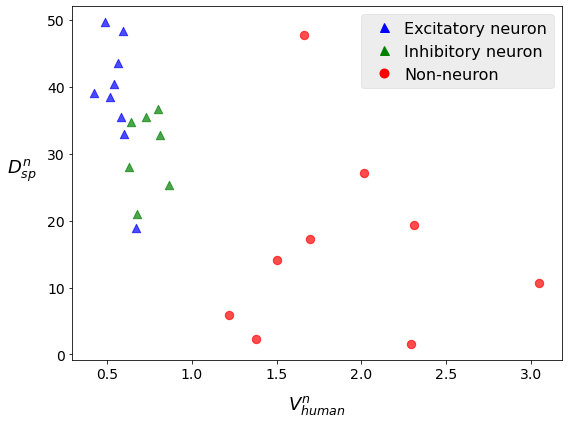

-0.5658353273729962 0.003197243148634342


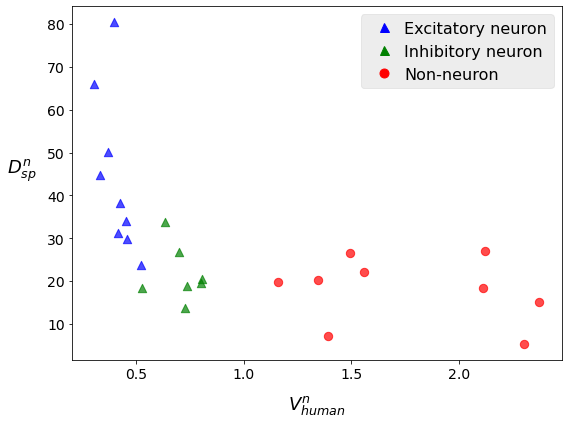

In [ ]:
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot
gene_list = ['DIS3','INTS1']
for ge in gene_list:
    cp_li, v, div_sp, div_sam = [], [], [], []
    colors = []
    markers = []
    
    for cp in cp_list:
        df3 = pd.read_csv(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/{cp}.csv', header=0)
        df4 = pd.read_csv(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/Human/{cp}.csv', header=0)
        
        if exp[ge][cp] > 0:
            cp_li.append(cp)
            div_sp.append(df3[ge][0] / exp[ge][cp])
            v.append(df4[ge][1] / exp[ge][cp])
            
            if cp in ExN:
                colors.append('blue')
                markers.append('^')
            elif cp in InN:
                colors.append('green')
                markers.append('^')
            elif cp in non_neuron:
                colors.append('red')
                markers.append('o')
    
    x = list(v)
    y = list(div_sp)
    txt = list(cp_li)
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    print(r,p)
    fig, ax = pyplot.subplots(figsize=(8, 6))
    pyplot.rcParams['font.family'] = 'sans-serif'
    pyplot.rcParams['font.sans-serif'] = ['Arial']
    for i in range(len(x)):
        ax.scatter(x[i], y[i], c=colors[i], marker=markers[i],s=70, alpha=0.7)
        #ax.annotate(txt[i], (x[i], y[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)
     #Create the legend
    exn_patch = pyplot.plot([], [], marker='^', markersize=9, color='blue', linestyle='none')[0]
    inn_patch = pyplot.plot([], [], marker='^', markersize=9, color='g', linestyle='none')[0]
    non_neuron_patch = pyplot.plot([], [], marker='o', markersize=9, color='red', linestyle='none')[0]
    
    font_props = FontProperties(family='Arial', size=16)

    ax.legend([exn_patch, inn_patch, non_neuron_patch], 
            ['Excitatory neuron', 'Inhibitory neuron', 'Non-neuron'], 
            frameon=True,  
            handletextpad=0.3,  
            framealpha=0.4,  
            facecolor='lightgrey',
            prop=font_props)
    #ax.set_xlabel('V', fontsize=16, fontname='Arial')  
    #ax.set_ylabel('D', fontsize=16, fontname='Arial') 
    
    # Add superscripts and subscripts to labels
    ax.set_xlabel(r'$V^n_{human}$', fontsize=18, fontname='Arial',labelpad=13)  # 'V' with superscript 'n'
    ax.set_ylabel(r'$D^n_{sp}$', fontsize=18, fontname='Arial',rotation=360, labelpad=25)
    #ax.set_title(ge)

    # Set tick label size
    #ax.tick_params(axis='both', which='major', labelsize=14,fontname='Arial')
    pyplot.xticks(fontsize=14,fontname='Arial')
    pyplot.yticks(fontsize=14,fontname='Arial')
    # Tweak spacing and add gridlines
    fig.tight_layout()
    pyplot.savefig(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/fig/{ge}_nc.png', dpi=300, bbox_inches='tight')
    # Show the plot
    pyplot.show()


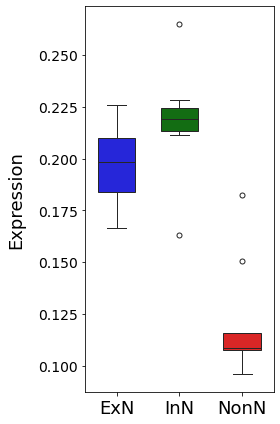


U-test results for DIS3:
ExN vs InN: p-value = 9.0338e-02
ExN vs NonN: p-value = 7.9227e-04
InN vs NonN: p-value = 1.4956e-03


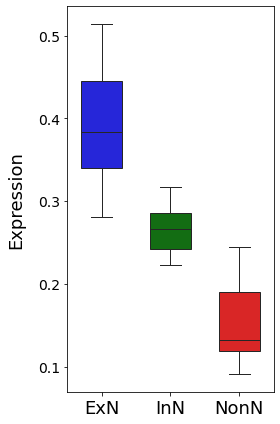


U-test results for INTS1:
ExN vs InN: p-value = 3.0383e-03
ExN vs NonN: p-value = 4.1229e-04
InN vs NonN: p-value = 2.1428e-03


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
gene_list = ['DIS3','INTS1']

def perform_u_test(data1, data2):
    statistic, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    return p_value

for gene in gene_list:
    data = {
        'ExN': [exp[gene][cp] for cp in ExN],
        'InN': [exp[gene][cp] for cp in InN],
        'NonN': [exp[gene][cp] for cp in non_neuron]
    }
    
    df = pd.DataFrame({k: pd.Series(v) for k, v in data.items()})
   
    plt.figure(figsize=(4, 6))
    sns.boxplot(data=df, width=0.6, palette={'ExN': 'blue', 'InN': 'green', 'NonN': 'red'},saturation=0.7, linewidth=1,flierprops={'marker': 'o', 'markerfacecolor': 'none', 'markersize': 5})
    #sns.stripplot(data=df, jitter=True, color='black', marker='o', facecolors='none', size=6, linewidth=1)
    plt.ylabel('Expression', fontsize=18,fontname='Arial',labelpad=13)
    plt.xticks(fontsize=18,fontname='Arial')
    plt.yticks(fontsize=14,fontname='Arial')
    #plt.title(f'Expression of {gene} in Different Cell Types')
    plt.tight_layout()
    #plt.savefig(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/fig/{gene}_exp.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\nU-test results for {gene}:")
    pairs = [('ExN', 'InN'), 
             ('ExN', 'NonN'), 
             ('InN', 'NonN')]
    
    for pair in pairs:
        p_value = perform_u_test(data[pair[0]], data[pair[1]])
        print(f"{pair[0]} vs {pair[1]}: p-value = {p_value:.4e}")
    

